In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
#판다스 라이브러리를 이용하여 데이터 파일을 데이터프레임 형태로 불러옵니다.
import pandas as pd

df = pd.read_csv("vgames2.csv", index_col=0)
df.reset_index(drop=True, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
#데이터프레임에 중복되는 데이터가 있는지 확인합니다.
#중복되는 데이터는 이름(Name)과 플랫폼(Platform)을 기준으로 찾습니다.
df_duplicated = df[df.duplicated(["Name", "Platform"])]
print("중복 개수 : ", len(df_duplicated))

#중복 데이터가 있는 경우, 중복되는 데이터들을 삭제해야합니다
#중복 데이터를 삭제하기 전, 중복 데이터를 직접 조회하여 비교해봅니다.
if len(df_duplicated) > 0:
  for i in range(len(df_duplicated)):
    name = df_duplicated.iloc[i,[0, 1]]["Name"]
    platform = df_duplicated.iloc[i,[0, 1]]["Platform"]
    query = df.query(f"Name == '{name}' and Platform == '{platform}'", engine="python")
    print("\nindex : ", i)
    print(query)

중복 개수 :  5

index :  0
               Name Platform    Year   Genre        Publisher NA_Sales  \
7346  Madden NFL 13      PS3  2012.0  Sports  Electronic Arts     2.11   
8717  Madden NFL 13      PS3  2012.0  Sports  Electronic Arts        0   

     EU_Sales JP_Sales Other_Sales  
7346     0.23        0        0.22  
8717     0.01        0           0  

index :  1
                             Name Platform  Year    Genre Publisher NA_Sales  \
8055  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   
9184  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   

     EU_Sales JP_Sales Other_Sales  
8055        0     0.02           0  
9184        0     0.02           0  

index :  2
                              Name Platform    Year   Genre        Publisher  \
1318   Need for Speed: Most Wanted     X360  2012.0  Racing  Electronic Arts   
12529  Need for Speed: Most Wanted     X360  2005.0  Racing  Electronic Arts   

      NA_Sales EU_Sales JP

In [4]:
df.drop(8717, axis=0, inplace=True)
df.drop(8055, axis=0, inplace=True)
df.drop(12529, axis=0, inplace=True)
df.drop(2673, axis=0, inplace=True)
df.drop(8651, axis=0, inplace=True)

#중복되는 데이터들을 삭제한 후, 삭제 과정이 잘 이루어졌는지 확인합니다.
df_duplicated = df[df.duplicated(["Name", "Platform"])]
print("중복 개수 : ", len(df_duplicated))

#데이터를 삭제 했기 때문에 데이터프레임의 인덱스를 재설정해줍니다.
df.reset_index(drop=True, inplace=True)
df

중복 개수 :  0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16588,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16589,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16590,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16591,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
#데이터프레임에 결측치가 있는지 확인합니다.
#여기서 결측치란 데이터셋에 누락된 데이터를 의미합니다.

def find_missing_value():
  exist_missing_value = True
  missing_values = df.isna().sum()

  for column in df.columns:
    if missing_values[column] > 0:
      exist_missing_value = False
      print("\n{} : {}".format(column, missing_values[column]))
      print(df[df[column].isna()].head())
      
  if exist_missing_value:
    print("결측치가 없습니다.")

find_missing_value()


Year : 269
                                            Name Platform  Year       Genre  \
31                                     Rock Band     X360   NaN        Misc   
109   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   NaN      Racing   
273  Jewel Link Chronicles: Mountains of Madness       DS   NaN      Puzzle   
358           Majesty 2: The Fantasy Kingdom Sim     X360   NaN  Simulation   
430                                   Famista 64      N64   NaN      Sports   

              Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
31      Electronic Arts     1.93     0.34        0        0.21  
109             Unknown        0        0     0.02           0  
273           Avanquest        0     0.06        0        0.01  
358             Unknown     0.03        0        0           0  
430  Namco Bandai Games        0        0     0.17        0.03  

Genre : 50
                                Name Platform    Year Genre  \
50          Ape Escape: On the Loose      PSP  2

In [6]:
#결측치를 확인해 본 결과, Year열에 269개, Genre열에 50개, Publisher열에 57개가 있는것을 알 수 있습니다.

#Year열의 결측치는 삭제하지 않고 0.0으로 대체합니다.
df.dropna(subset=['Year'], inplace=True)
#Genre열의 결측치는 삭제하지 않고 'MISC'로 대체합니다.
df["Genre"].fillna("MISC", inplace=True)
#Publisher열의 결측치는 삭제하지 않고 공백으로 대체합니다.
df["Publisher"].fillna("", inplace=True)

#결측치 처리가 잘 이뤄졌는지 확인해봅니다.
find_missing_value()

#데이터를 삭제 했기 때문에 데이터프레임의 인덱스를 재설정해줍니다.
df.reset_index(drop=True, inplace=True)
df

결측치가 없습니다.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16319,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16320,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16321,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16322,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
#데이터프레임의 각 열마다 데이터 타입을 확인해봅니다.
#문자열 같은 경우 object 타입을 사용하고 정수형은 int, 실수형은 float 타입을 사용합니다.
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [8]:
#데이터 타입을 확인해 본 결과, Year열의 데이터 타입이 float64, NA_Sales, EU_Sales, JP_Sales, Other_Sales열의 데이터 타입이 object로 설정되어있습니다.
#Year열의 데이터 타입을 int로, NA_Sales, EU_Sales, JP_Sales, Other_Sales열의 데이터 타입을 float로 변환해줍니다.

import re
text = re.compile("[a-z, A-Z]")

columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

def find_other_type_value():
  for column in columns:
    other_type_value = df[column].str.contains(text)
    print("\n{} : {}".format(column, other_type_value.sum()))
    if other_type_value.sum() > 0:
      print(df[df[column].str.contains(text)].head())
    else:
      print("문자열이 들어간 데이터가 없습니다.")

find_other_type_value()


NA_Sales : 192
                             Name Platform    Year   Genre  \
10                    Ford Racing       PS  2001.0  Racing   
44   Resident Evil: Revelations 2      PS3  2015.0  Action   
143            TOCA Race Driver 3       PC  2006.0  Racing   
442    Medal of Honor: Warfighter     X360  2012.0  Action   
453                       F1 2010      PS3  2010.0  Racing   

              Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10   Empire Interactive     480K    0.33M       0K        0.06  
44               Capcom      60K     0.08     0.16        0.03  
143         Codemasters       0K     0.02        0           0  
442     Electronic Arts    0.58M     0.47     0.01         0.1  
453         Codemasters    0.25M     0.76     0.08        0.27  

EU_Sales : 196
                          Name Platform    Year     Genre  \
10                 Ford Racing       PS  2001.0    Racing   
35   Advance Wars: Dual Strike       DS  2005.0  Strategy   
126  Rozen Maiden: Geb

In [9]:
#NA_Sales, EU_Sales, JP_Sales, Other_Sales에 문자열이 섞인 데이터의 개수와 데이터 내용을 확인해 본 결과, 문자열 "K", "M" 과 숫자가 혼합된 형태임을 알 수 있습니다.
#"K", "M"은 큰 단위의 숫자를 축약해서 표현해주는 축약어입니다. "K"는 1,000, "M"은 1,000,000을 의미합니다.
#"K"와 "M"을 숫자로 변환하고 계산하여 데이터 자료형을 일치해줍니다.
for column in columns:
  for index, row in enumerate(df[column]):
    if "K" in row:
      df.loc[index,column] = str(float(row.split('K')[0]) * 0.001)
    elif "M" in row:
      df.loc[index,column] = row.split('M')[0]

find_other_type_value()


NA_Sales : 0
문자열이 들어간 데이터가 없습니다.

EU_Sales : 0
문자열이 들어간 데이터가 없습니다.

JP_Sales : 0
문자열이 들어간 데이터가 없습니다.

Other_Sales : 0
문자열이 들어간 데이터가 없습니다.


In [10]:
df = df.astype({"Year":"int", "NA_Sales":"float", "EU_Sales":"float", "JP_Sales":"float", "Other_Sales":"float"})
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

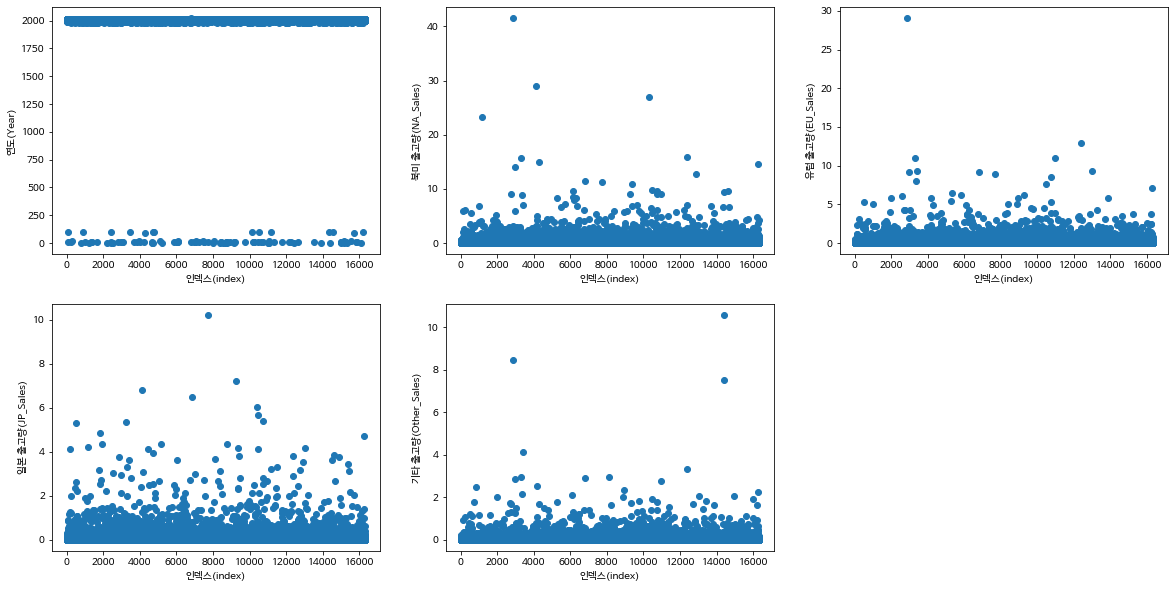

In [11]:
import matplotlib.pyplot as plt

plt.rc("font", family='NanumBarunGothic')

plt.figure(figsize=(20,10))

plt.subplot(231)
plt.scatter(range(len(df)), df["Year"])
plt.xlabel("인덱스(index)")
plt.ylabel("연도(Year)")

plt.subplot(232)
plt.scatter(range(len(df)), df["NA_Sales"])
plt.xlabel("인덱스(index)")
plt.ylabel("북미 출고량(NA_Sales)")

plt.subplot(233)
plt.scatter(range(len(df)), df["EU_Sales"])
plt.xlabel("인덱스(index)")
plt.ylabel("유럽 출고량(EU_Sales)")

plt.subplot(234)
plt.scatter(range(len(df)), df["JP_Sales"])
plt.xlabel("인덱스(index)")
plt.ylabel("일본 출고량(JP_Sales)")

plt.subplot(235)
plt.scatter(range(len(df)), df["Other_Sales"])
plt.xlabel("인덱스(index)")
plt.ylabel("기타 출고량(Other_Sales)")

plt.show()

In [12]:
wrong_values = df.query("Year < 250").sort_values('Year', ascending=True)
wrong_values

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9135,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0.00,0.00,0.20,0.00
14422,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01
16122,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00
2217,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0.00,0.09
8547,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.60,0.00,0.20
...,...,...,...,...,...,...,...,...,...
10156,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0.00,0.00
80,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
14331,S.C.A.R.S,PS,98,Racing,Ubisoft,0.05,0.03,0.00,0.01
3438,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0.00,0.01


In [13]:
for index, year in enumerate(wrong_values["Year"]):
  df_idx = wrong_values.iloc[index].name
  if year < 22:
    df.loc[df_idx, "Year"] = year + 2000
  else:
    df.loc[df_idx, "Year"] = year + 1900

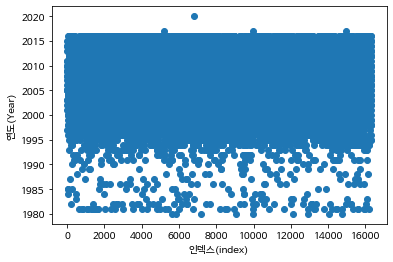

In [14]:
plt.scatter(range(len(df)), df["Year"])
plt.xlabel("인덱스(index)")
plt.ylabel("연도(Year)")
plt.show()

In [15]:
df.to_csv("game_dataset.csv")
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16319,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16320,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16321,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16322,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [16]:
#지역에 따라서 선호하는 게임 장르가 다를까
import numpy as np

na = []
eu = []
jp = []
other = []

for row in df.iterrows():
  sale = np.array([row[1]["NA_Sales"], row[1]["EU_Sales"], row[1]["JP_Sales"], row[1]["Other_Sales"]])

  idx = np.argmax(sale)
  max = np.max(sale)

  equal = False

  for index, value in enumerate(sale):
    if index != idx and value == max:
      equal = True
      break

  if equal == False and row[1]["Genre"] != "":
    if idx == 0:
      na.append(row[1]["Genre"])
    elif idx == 1:
      eu.append(row[1]["Genre"])
    elif idx == 2:
      jp.append(row[1]["Genre"])
    elif idx == 3:
      other.append(row[1]["Genre"])

print(len(na))
print(len(eu))
print(len(jp))
print(len(other))

9601
2323
3985
76


In [17]:
genres = df["Genre"].unique()

df_na = pd.DataFrame({"Genre":genres})
df_eu = pd.DataFrame({"Genre":genres})
df_jp = pd.DataFrame({"Genre":genres})
df_other = pd.DataFrame({"Genre":genres})

for index, genre in enumerate(genres):
  df_na.loc[index, "Count"] = na.count(genre)
  df_eu.loc[index, "Count"] = eu.count(genre)
  df_jp.loc[index, "Count"] = jp.count(genre)
  df_other.loc[index, "Count"] = other.count(genre)

df_na['Count'] = df_na['Count'].astype('int')
df_eu['Count'] = df_eu['Count'].astype('int')
df_jp['Count'] = df_jp['Count'].astype('int')
df_other['Count'] = df_other['Count'].astype('int')

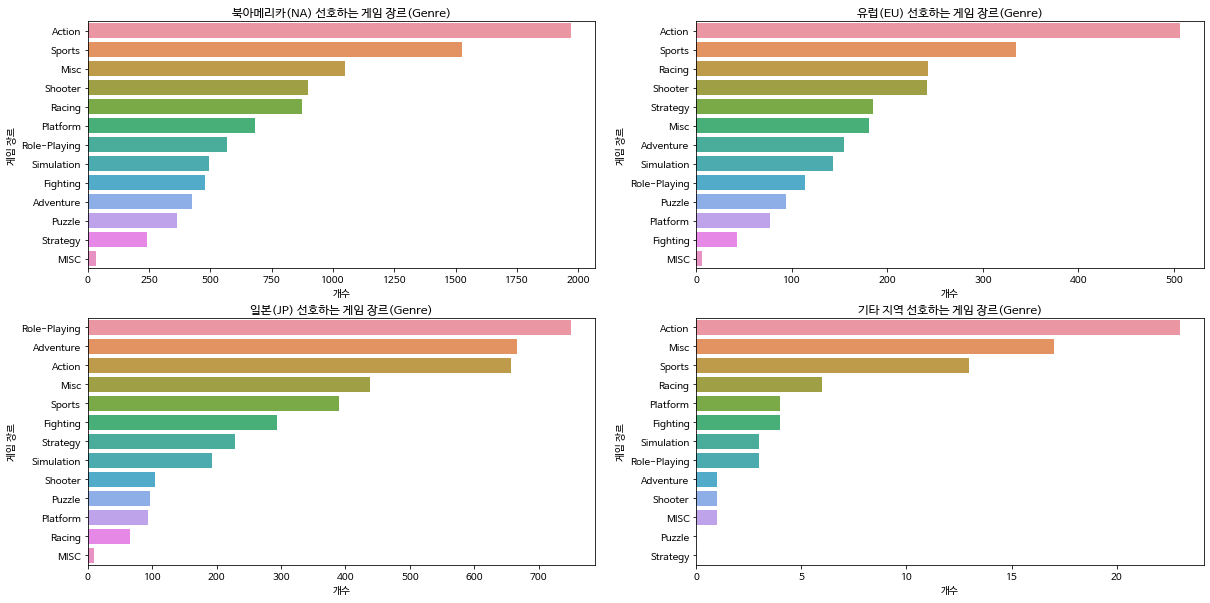

In [18]:
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(221)
sns.barplot(data=df_na.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('북아메리카(NA) 선호하는 게임 장르(Genre)')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(222)
sns.barplot(data=df_eu.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('유럽(EU) 선호하는 게임 장르(Genre)')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(223)
sns.barplot(data=df_jp.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('일본(JP) 선호하는 게임 장르(Genre)')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(224)
sns.barplot(data=df_other.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('기타 지역 선호하는 게임 장르(Genre)')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.show()

In [19]:
#연도별 게임의 트렌드가 있을까
df_year = df.query("Year > 0").sort_values('Year', ascending=True)

df_80_year = pd.DataFrame({"Genre":genres})
df_90_year = pd.DataFrame({"Genre":genres})
df_00_year = pd.DataFrame({"Genre":genres})
df_10_year = pd.DataFrame({"Genre":genres})

for index, genre in enumerate(genres):
  df_80_year.loc[index, "Count"] = len(df_year.query(f"Year >= 1980 and Year < 1990 and Genre == '{genre}'"))
  df_90_year.loc[index, "Count"] = len(df_year.query(f"Year >= 1990 and Year < 2000 and Genre == '{genre}'"))
  df_00_year.loc[index, "Count"] = len(df_year.query(f"Year >= 2000 and Year < 2010 and Genre == '{genre}'"))
  df_10_year.loc[index, "Count"] = len(df_year.query(f"Year >= 2010 and Year <= 2020 and Genre == '{genre}'"))

df_80_year['Count'] = df_80_year['Count'].astype('int')
df_90_year['Count'] = df_90_year['Count'].astype('int')
df_00_year['Count'] = df_00_year['Count'].astype('int')
df_10_year['Count'] = df_10_year['Count'].astype('int')

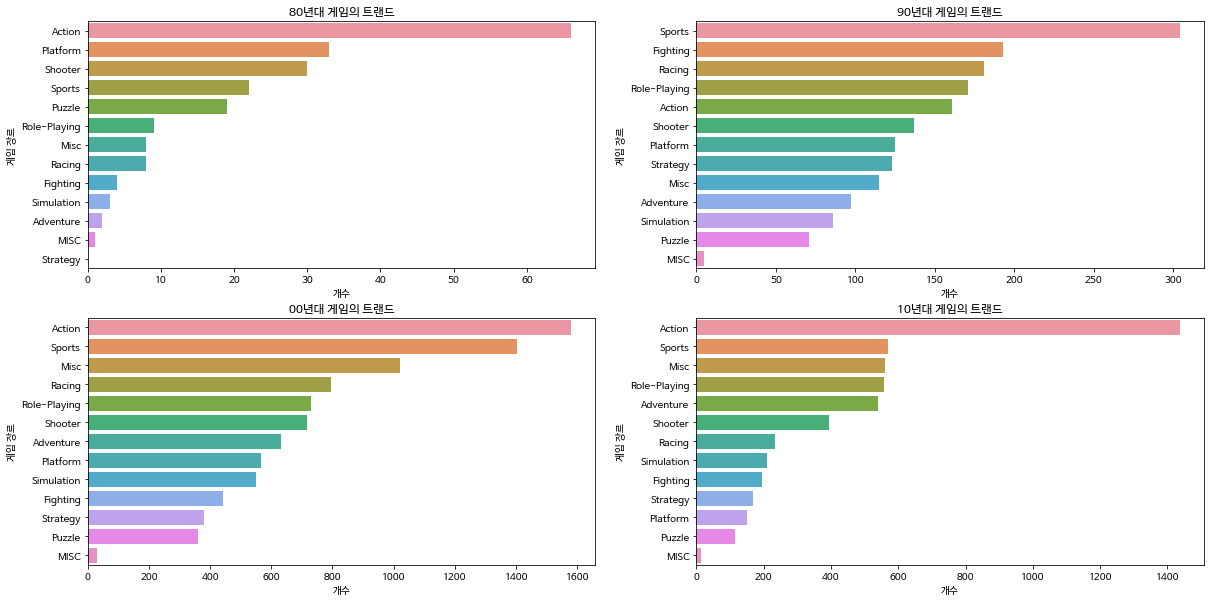

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.barplot(data=df_80_year.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('80년대 게임의 트랜드')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(222)
sns.barplot(data=df_90_year.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('90년대 게임의 트랜드')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(223)
sns.barplot(data=df_00_year.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('00년대 게임의 트랜드')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.subplot(224)
sns.barplot(data=df_10_year.sort_values("Count", ascending=False), x="Count", y="Genre", orient='h')
plt.title('10년대 게임의 트랜드')
plt.xlabel("개수")
plt.ylabel('게임 장르')

plt.show()

In [21]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스
df_copy = df.copy()
df_copy["Sales_Sum"] = df_copy["NA_Sales"] + df_copy["EU_Sales"] + df_copy["JP_Sales"] + df_copy["Other_Sales"]

#전체
df_top_100 = df_copy.sort_values('Sales_Sum', ascending=False).iloc[:100]
df_top_100.reset_index(drop=True, inplace=True)

#최신순
df_recent_top_100 = df_top_100.query("Year >= 2010")
df_recent_top_100.reset_index(drop=True, inplace=True)

In [22]:
def create_dataframe(df, column):
  data = df[column].unique()

  df_data = pd.DataFrame({column : data})

  for index, value in enumerate(data):
    df_data.loc[index, "Count"] = len(df.query(f"{column} == '{value}'"))

  df_data['Count'] = df_data['Count'].astype('int')
  df_data.sort_values("Count", ascending=False, inplace=True)
  df_data.reset_index(drop=True, inplace=True)

  if len(df_data) > 7:
    etc = pd.DataFrame({column : ["etc"], 
                        "Count" : df_data[6:len(df_data)+1]["Count"].sum()})

    df_data.drop(df_data[6:len(df_data)+1].index, inplace=True)

    df_data = pd.concat([df_data, etc])
    
    df_data.sort_values("Count", ascending=False, inplace=True)
    df_data.reset_index(drop=True, inplace=True)
  
  return df_data

In [23]:
df_top_100_platform = create_dataframe(df_top_100, "Platform")
df_top_100_genre = create_dataframe(df_top_100, "Genre")
df_top_100_publisher = create_dataframe(df_top_100, "Publisher")

df_recent_top_100_platform = create_dataframe(df_recent_top_100, "Platform")
df_recent_top_100_genre = create_dataframe(df_recent_top_100, "Genre")
df_recent_top_100_publisher = create_dataframe(df_recent_top_100, "Publisher")

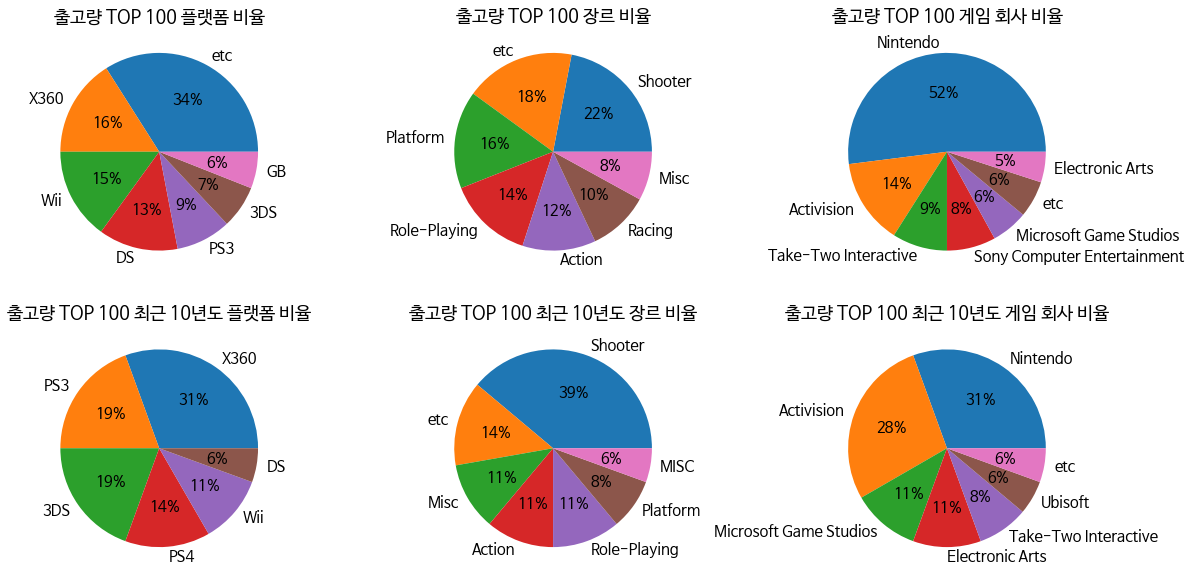

In [24]:
plt.figure(figsize=(20,10))
plt.rc('font', size=15)

plt.subplot(231)
plt.pie(df_top_100_platform["Count"], labels = df_top_100_platform["Platform"], autopct='%.0f%%')
plt.title('출고량 TOP 100 플랫폼 비율')

plt.subplot(232)
plt.pie(df_top_100_genre["Count"], labels = df_top_100_genre["Genre"], autopct='%.0f%%')
plt.title('출고량 TOP 100 장르 비율')

plt.subplot(233)
plt.pie(df_top_100_publisher["Count"], labels = df_top_100_publisher["Publisher"], autopct='%.0f%%')
plt.title('출고량 TOP 100 게임 회사 비율')

plt.subplot(234)
plt.pie(df_recent_top_100_platform["Count"], labels = df_recent_top_100_platform["Platform"], autopct='%.0f%%')
plt.title('출고량 TOP 100 최근 10년도 플랫폼 비율')

plt.subplot(235)
plt.pie(df_recent_top_100_genre["Count"], labels = df_recent_top_100_genre["Genre"], autopct='%.0f%%')
plt.title('출고량 TOP 100 최근 10년도 장르 비율')

plt.subplot(236)
plt.pie(df_recent_top_100_publisher["Count"], labels = df_recent_top_100_publisher["Publisher"], autopct='%.0f%%')
plt.title('출고량 TOP 100 최근 10년도 게임 회사 비율')

plt.show()